In [1]:
import numpy as np
import saxsdocument
import os
import sys
import math
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
#import panel as pn
#pn.extension()
#matplotlib.use('Agg')

import time
pi = math.pi

In [38]:
def dir_ff(smin, smax, const, colors = ['b', 'g']):
    if smin >= smax: print("Smin > Smax!")

    s_new = s[(s >= smin) & (s<= smax)]
    Is_new = Is[(s >= smin) & (s<= smax)]
    Is_new += const
    Err_new = Err[(s >= smin) & (s<= smax)]
    ax1.clear()
    ax1.set_xlabel("Inverse Angstrom")
    ax1.set_ylabel("Intensity")
    ax1.semilogy(s, Is, color = colors)
    ax1.axvline(x=smin, color = 'r')
    ax1.axvline(x=smax, color = 'r')
    markers, caps, bars = ax1.errorbar(s_new, Is_new, yerr= Err_new,  capsize=1, 
    elinewidth=1, markeredgewidth=1, ecolor = 'grey', color = colors)
    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]

    r_max = 200
    fourier_pred = np.zeros(r_max*10)
    r = np.arange(0.0, r_max, 0.1)
    for i, rr in enumerate(r):
        hit = s_new*s_new*np.multiply(Is_new, np.sinc(s_new*rr/pi))
        fourier_pred[i] = (rr*rr/2*pi*pi)*np.trapz(np.transpose(hit))*0.000004
        if fourier_pred[i] < 0 and i > 10: 
            fourier_pred[i:] = 0
            break
    ax2.clear()
    ax2.set_xlabel("Angstrom")
    ax2.set_ylabel("PDDF")
    ax2.axhline(y=0, color = 'g')
    ax2.plot(r, fourier_pred, color = colors)
    #four_pddf = np.vstack(r, fourier_pred)
    #np.savetxt("dima_fourier.dat", np.transpose(four_pddf), fmt = "%.8e")
    s_double = np.arange(0.0, np.max(s), 0.01)
    double_fourier = np.zeros(len(s_double))
    for i, ss in enumerate(s_double):
        tih = np.multiply(fourier_pred, np.sinc(ss*r/pi))
        double_fourier[i] = 4*pi*np.trapz(np.transpose(tih))
    ax1.plot(s_double, double_fourier, '--', color = 'r')
    fig.canvas.draw()
    # compute a sum of P(r) second derivatives
    sd = np.abs(np.sum(np.diff(fourier_pred, 2)))
    return dir_ff, sd

<IPython.core.display.Javascript object>


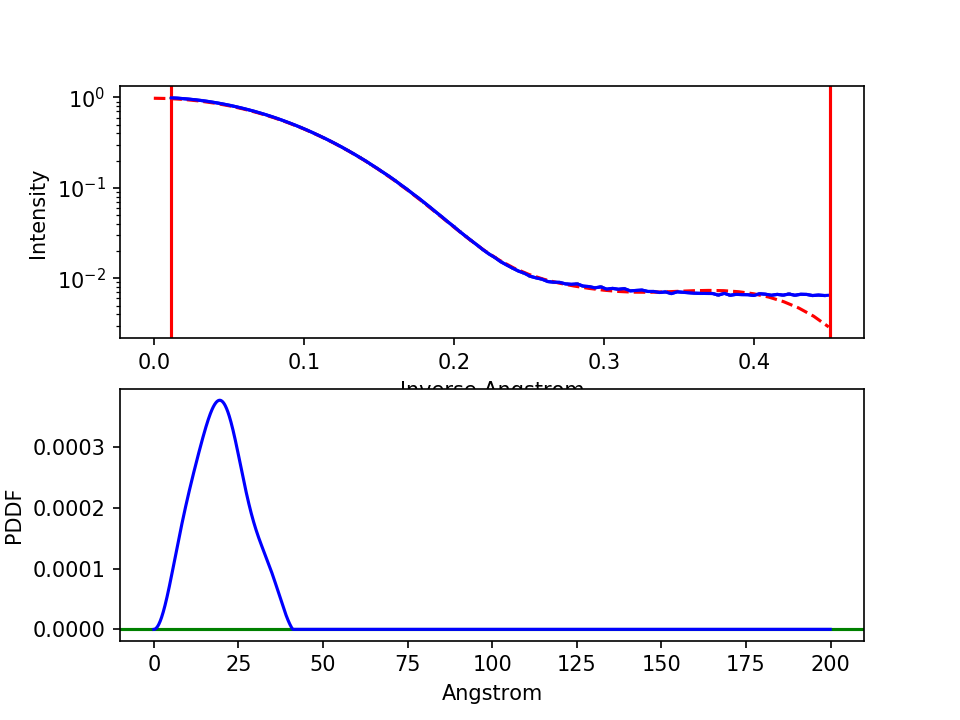

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMjMxMzcyMzQ5OTk5OTk5OTUsIGRlc2NyaXB0aW9uPXUnc21pbicsIG1heD0wLjQ1MDk4LCBtaW49MC4wMTE3NjQ3LCDigKY=


In [40]:
path = "jupyter_scripts/big_data-top-1023/3aqz_pdb1.dat"
#path = "SASDGB6.dat"
fig, (ax1, ax2) = plt.subplots(2,1)
fig.canvas.draw()

doc  = saxsdocument.read(path)
dat  = np.transpose(np.array(doc.curve[0]))
s   = np.array(dat[0])
Is  = np.array(dat[1])
Err = np.array(dat[2])


interact(dir_ff, smin=(min(s),max(s), (max(s) - min(s))/100.0),smax=(min(s),max(s), (max(s) - min(s))/100.0), const = (-3, 3, 0.1));